📁 Please upload your CSV file when prompted...


Saving IBM-HR-Employee-Attrition.csv to IBM-HR-Employee-Attrition (1).csv

✅ Dataset 'IBM-HR-Employee-Attrition.csv' loaded successfully!

📊 Total Employees: 1470
🚪 Employees likely to leave: 237 (16.12%)
✅ Retention rate: 83.88%

📌 First 5 rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other        

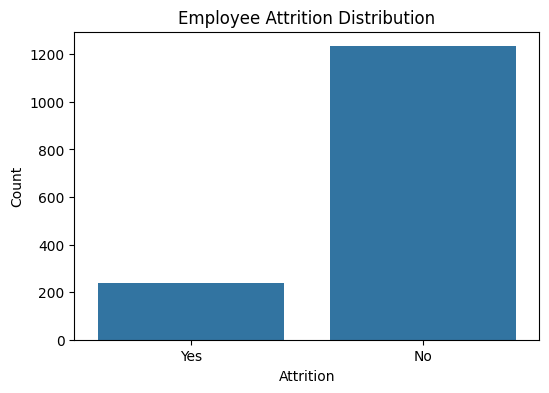

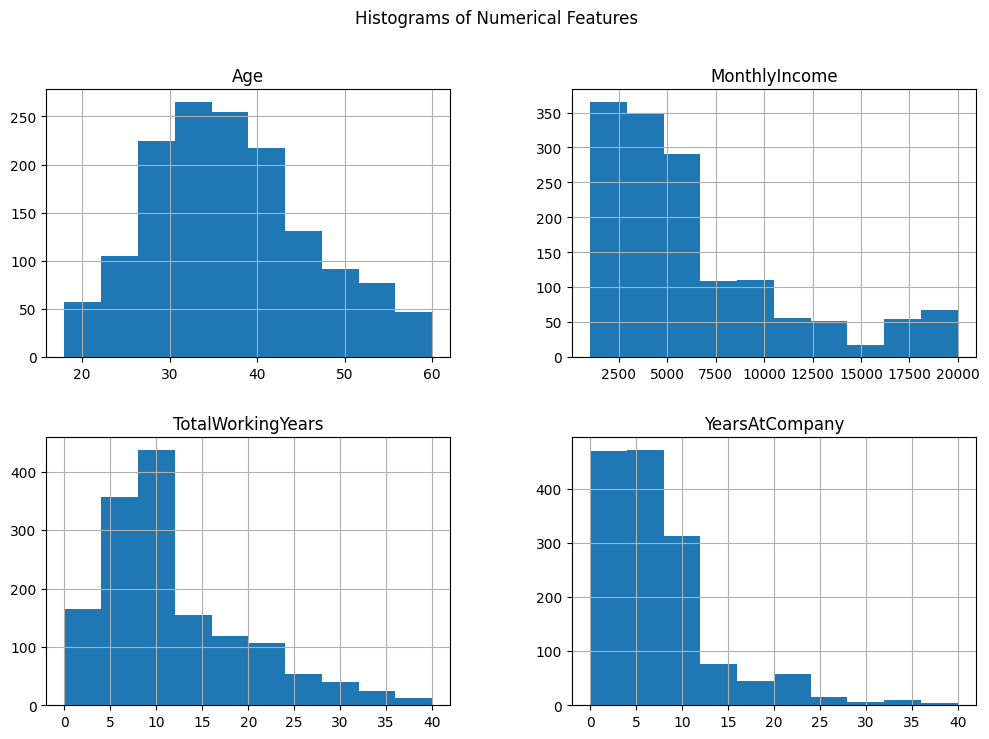

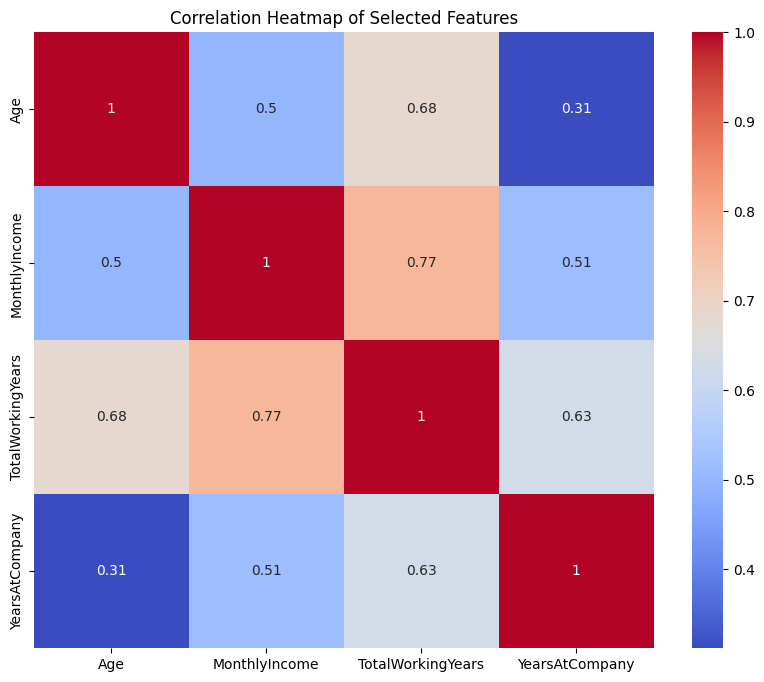


🔧 Preprocessing the data...

🔍 Splitting the data into training and testing sets...

📚 Training set shape: (1176, 44)
🧪 Test set shape: (294, 44)

🎯 Random Forest Classifier Report:
              precision    recall  f1-score   support

       False       0.85      0.97      0.91       247
        True       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294

📉 Confusion Matrix:
[[240   7]
 [ 42   5]]

🧠 Logistic Regression Classifier Report:
              precision    recall  f1-score   support

       False       0.88      0.98      0.93       247
        True       0.72      0.28      0.40        47

    accuracy                           0.87       294
   macro avg       0.80      0.63      0.66       294
weighted avg       0.85      0.87      0.84       294

📉 Confusion Matrix:
[[242   5]
 [ 34  13]]

🔍 Generating SHAP explanations for

<Figure size 640x480 with 0 Axes>

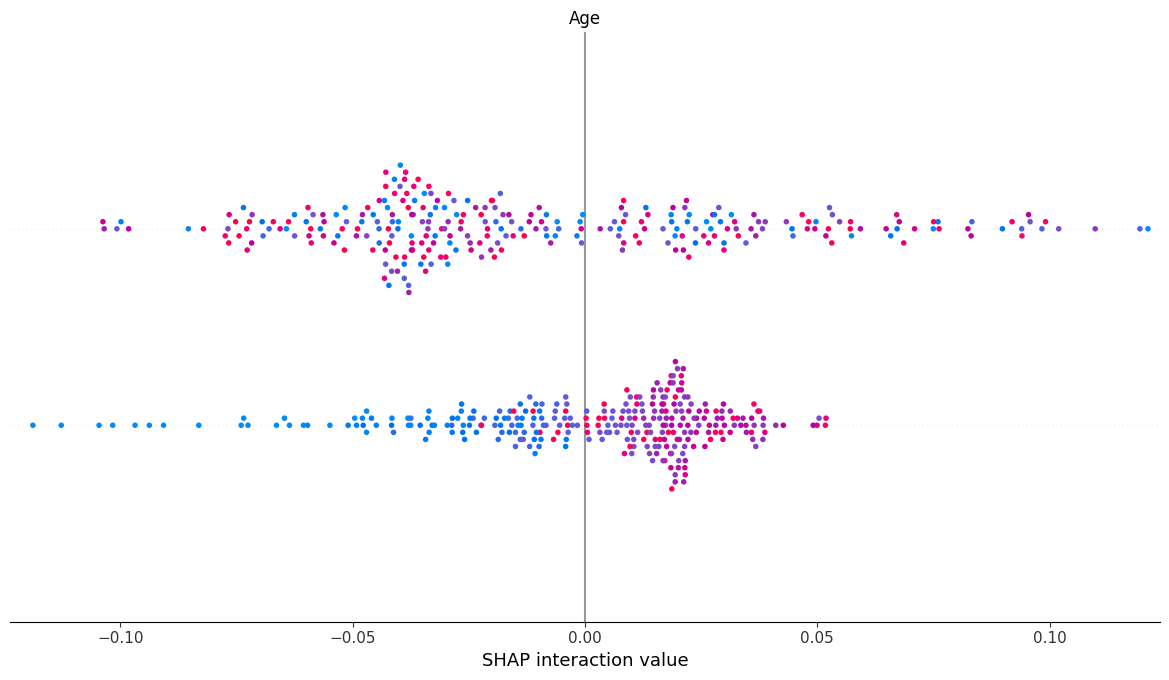


📊 Displaying Top 10 Important Features...


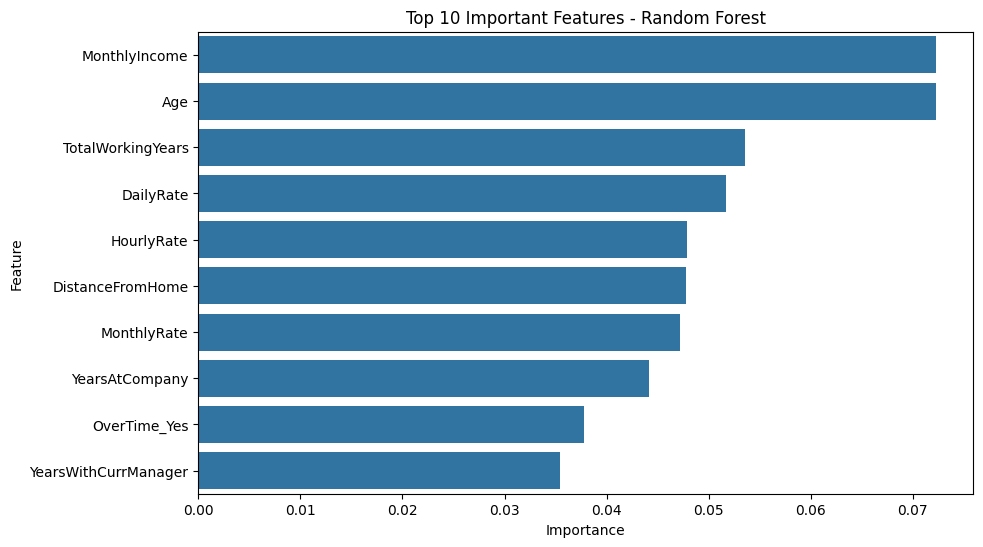


📝 --- HR Insights Summary ---
1. 🔍 Key features influencing attrition are shown in the SHAP summary.
2. 📈 Top factors include MonthlyIncome, Age, JobRole, Overtime, YearsAtCompany, etc.
3. 🧘‍♀️ Consider strategies like improving work-life balance, Overtime policy, career growth.
4. 📢 Use predictive models to flag high-risk employees early.

✅ EMPLOYEE ATTRITION PREDICTION PIPELINE COMPLETE
--------------------------------------------------
✔️ Dataset Loaded and Preprocessed
✔️ Performed EDA and Visualizations
✔️ Trained 2 Models: Random Forest & Logistic Regression
✔️ Evaluated Performance using Classification Report & Confusion Matrix
✔️ Applied SHAP for Model Explainability
✔️ Identified Top Contributing Features to Attrition
✔️ Provided Actionable HR Insights
✔️ Project Ready for Reporting or Dashboard Integration 🚀


In [2]:
# ================================
# 📌 Employee Attrition Prediction and Explainability Pipeline
# ================================

# --- Step 0: Import Required Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import shap
import warnings
warnings.filterwarnings("ignore")

# --- Step 1: Upload and Load the Dataset ---
from google.colab import files
print("📁 Please upload your CSV file when prompted...")
uploaded = files.upload()

file_name = 'IBM-HR-Employee-Attrition.csv'
data = pd.read_csv(file_name)
print(f"\n✅ Dataset '{file_name}' loaded successfully!\n")

# Display basic attrition stats
total_employees = len(data)
attrition_counts = data['Attrition'].value_counts()
num_leaving = attrition_counts.get('Yes', 0)
num_staying = attrition_counts.get('No', 0)
retention_rate = (num_staying / total_employees) * 100
attrition_rate = (num_leaving / total_employees) * 100

print(f"📊 Total Employees: {total_employees}")
print(f"🚪 Employees likely to leave: {num_leaving} ({attrition_rate:.2f}%)")
print(f"✅ Retention rate: {retention_rate:.2f}%\n")

# --- Step 2: Exploratory Data Analysis (EDA) ---
print("📌 First 5 rows of the dataset:")
print(data.head())

print("\nℹ️ Dataset Info:")
print(data.info())

print("\n📈 Summary Statistics:")
print(data.describe())

# Countplot of Attrition Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=data)
plt.title('Employee Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# Histograms of important numerical features
num_vars = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
data[num_vars].hist(figsize=(12,8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data[num_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# --- Step 3: Data Preprocessing ---
print("\n🔧 Preprocessing the data...")

# Remove non-informative or constant columns
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# One-hot encode categorical features
data_encoded = pd.get_dummies(data, drop_first=True)

# Define target column
target_col = 'Attrition_Yes'
if target_col not in data_encoded.columns:
    raise ValueError(f"Target column '{target_col}' not found.")

X = data_encoded.drop(target_col, axis=1)
y = data_encoded[target_col]

# --- Step 4: Train/Test Split ---
print("\n🔍 Splitting the data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📚 Training set shape: {X_train.shape}")
print(f"🧪 Test set shape: {X_test.shape}")

# --- Step 5: Model Training and Evaluation ---

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("\n🎯 Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
print("📉 Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("\n🧠 Logistic Regression Classifier Report:")
print(classification_report(y_test, lr_predictions))
print("📉 Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

# --- Step 6: SHAP Explainability (for Random Forest Model) ---
print("\n🔍 Generating SHAP explanations for feature importance...")
shap.initjs()

# SHAP values for Tree-based models
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Use class 1 values (i.e., predicting Attrition = Yes)
shap_summary = shap_values[1] if isinstance(shap_values, list) else shap_values
shap.summary_plot(shap_summary, X_test)

# --- Step 7: Feature Importance Plot ---
print("\n📊 Displaying Top 10 Important Features...")
importances = rf_model.feature_importances_
features = X_train.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# --- Step 8: HR Insights Summary ---
print("\n📝 --- HR Insights Summary ---")
print("1. 🔍 Key features influencing attrition are shown in the SHAP summary.")
print("2. 📈 Top factors include MonthlyIncome, Age, JobRole, Overtime, YearsAtCompany, etc.")
print("3. 🧘‍♀️ Consider strategies like improving work-life balance, Overtime policy, career growth.")
print("4. 📢 Use predictive models to flag high-risk employees early.")

# --- Step 9: Final Wrap-up ---
print("\n✅ EMPLOYEE ATTRITION PREDICTION PIPELINE COMPLETE")
print("--------------------------------------------------")
print("✔️ Dataset Loaded and Preprocessed")
print("✔️ Performed EDA and Visualizations")
print("✔️ Trained 2 Models: Random Forest & Logistic Regression")
print("✔️ Evaluated Performance using Classification Report & Confusion Matrix")
print("✔️ Applied SHAP for Model Explainability")
print("✔️ Identified Top Contributing Features to Attrition")
print("✔️ Provided Actionable HR Insights")
print("✔️ Project Ready for Reporting or Dashboard Integration 🚀")
